In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import load_files

def load_train_data():

    train_data = pd.read_csv('/content/train.csv', header = 0)

    X_train = train_data.drop(columns='fake')
    y_train = train_data['fake']

    return X_train, y_train

In [10]:
from sklearn.datasets import load_files

def load_test_data():

    test_data = pd.read_csv('/content/test.csv', header = 0)

    X_test = test_data.drop(columns='fake')
    y_test = test_data['fake']

    return X_test, y_test

In [11]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):

    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    train_scores = scores['train_score']
    val_scores = scores['test_score']

    train_mean = np.mean(train_scores)
    val_mean = np.mean(val_scores)

    return train_mean, val_mean

In [12]:
def print_grid_search_result(grid_search):

    print(grid_search.best_params_)

    best_train = grid_search.cv_results_["mean_train_score"][grid_search.best_index_]
    print("best mean_train_score: {:.3f}".format(best_train))

    best_test = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
    print("best mean_test_score: {:.3f}".format(best_test))

In [13]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title='confusion matrix'):

    data = confusion_matrix(y_actual, y_pred)
    ax = sns.heatmap(data,
                     annot=True,
                     cbar=False,
                     fmt='d',
                     xticklabels = labels,
                     yticklabels = labels)
    ax.set_title(title)
    ax.set_xlabel("predicted values")
    ax.set_ylabel("actual values")
    plt.show()

In [14]:
X_data, y_data = load_train_data()
print(X_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 49.6 KB
None


In [15]:
X_data.head()

profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  
0        1000       955  
1        2740       533  
2         159        98  
3         414       651  
4         151       126

In [16]:
print("Size: ",X_data.shape, ", Type: ", type(X_data))
print("Size: ",y_data.shape, ", Type: ", type(y_data))

Size:  (576, 11) , Type:  <class 'pandas.core.frame.DataFrame'>
Size:  (576,) , Type:  <class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Correlation Heatmap Between Features')

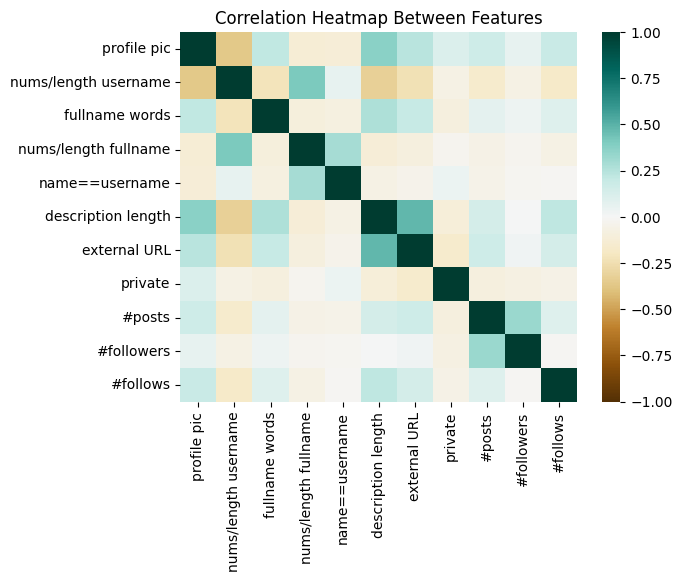

In [17]:
data_corr = X_data.corr(method='pearson')
ax = sns.heatmap(data_corr, vmin=-1, vmax=1, cmap='BrBG')
ax.set_title("Correlation Heatmap Between Features")

In [18]:
print(X_data.isnull().sum())

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
dtype: int64


In [19]:
unique, freq = np.unique(y_data, return_counts = True)

for i, j in zip(unique, freq):
    print("Label: ", i, ", Frequency: ", j)

Label:  0 , Frequency:  288
Label:  1 , Frequency:  288


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=37)

In [21]:
print(X_train.shape)
print(y_train.shape)

(460, 11)
(460,)


In [25]:
model = GradientBoostingClassifier(max_depth=5, random_state=56)

parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}


grid2 = GridSearchCV(model, parameters, cv=7, scoring='average_precision', return_train_score=True)

In [27]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'n_estimators': [300, 500, 700, 1000]},
             return_train_score=True, scoring='average_precision')

In [28]:
print_grid_search_result(grid1)

{'max_depth': 7, 'n_estimators': 700}
best mean_train_score: 1.000
best mean_test_score: 0.985


In [23]:
from sklearn.model_selection import GridSearchCV
import os

model = RandomForestClassifier(random_state=55)

parameters = {'n_estimators': [300, 500, 700, 1000],
              'max_depth': [7, 9, 11, 13]}

grid1 = GridSearchCV(model, parameters, cv=7, scoring='average_precision',return_train_score=True)

In [29]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=GradientBoostingClassifier(max_depth=5, random_state=56),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='average_precision')

In [30]:
print_grid_search_result(grid2)

{'learning_rate': 1.0, 'n_estimators': 50}
best mean_train_score: 1.000
best mean_test_score: 0.981


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('preprocessing', StandardScaler()), ('classifier', grid1.best_estimator_)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=700,
                                        random_state=55))])

In [32]:
print("Test score: {:.3f}".format(pipeline.score(X_test, y_test)))

Test score: 0.922


In [33]:
X_final, y_final = load_test_data()

In [34]:
print("Test score: {:.3f}".format(pipeline.score(X_final, y_final)))

Test score: 0.908


In [35]:
from sklearn.metrics import classification_report
y_pred = pipeline.predict(X_final)
print(classification_report(y_final, y_pred, target_names=["genuine", "fake"]))

              precision    recall  f1-score   support

     genuine       0.90      0.92      0.91        60
        fake       0.92      0.90      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



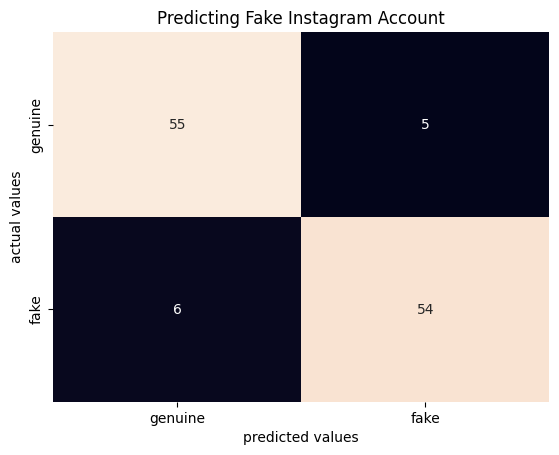

In [36]:
labels = ["genuine", "fake"]
title = "Predicting Fake Instagram Account"
plot_confusion_matrix(y_final, y_pred, labels, title)